In [1]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

'\nDựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng\nDataset: FuelConsumptionCo2.csv\n'

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install seaborn

In [5]:
!pip install matplotlib

In [6]:
!pip install sklearn

In [7]:
!pip install scikit-learn

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and quick view data

In [9]:
data = pd.read_csv('FuelConsumptionCo2.csv')

In [10]:
# ? rows ? columns ? non-null ? type ? duplicate

In [11]:
data.shape

(1067, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
data.duplicated().sum()

0

# Data Cleaning

In [14]:
data.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [15]:
data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']] = data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

# Descriptive Analysis

In [17]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
data["MODELYEAR"].unique()

array([2014])

In [19]:
data.select_dtypes('category').describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Distribution_of_Annual_Household_Income_in_the_United_States_2010.png)

https://www.youtube.com/watch?v=2oJldeE4JcU

https://www.youtube.com/watch?v=rzFX5NWojp0m

<Figure size 1008x720 with 0 Axes>

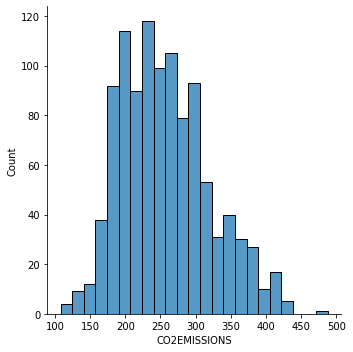

In [20]:
plt.figure(figsize=(14,10))
sns.displot(data=data['CO2EMISSIONS'])

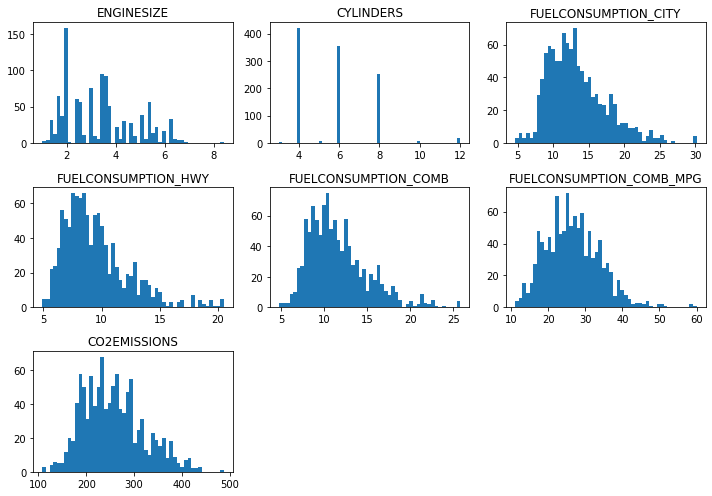

In [21]:
df_num = data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

<AxesSubplot:>

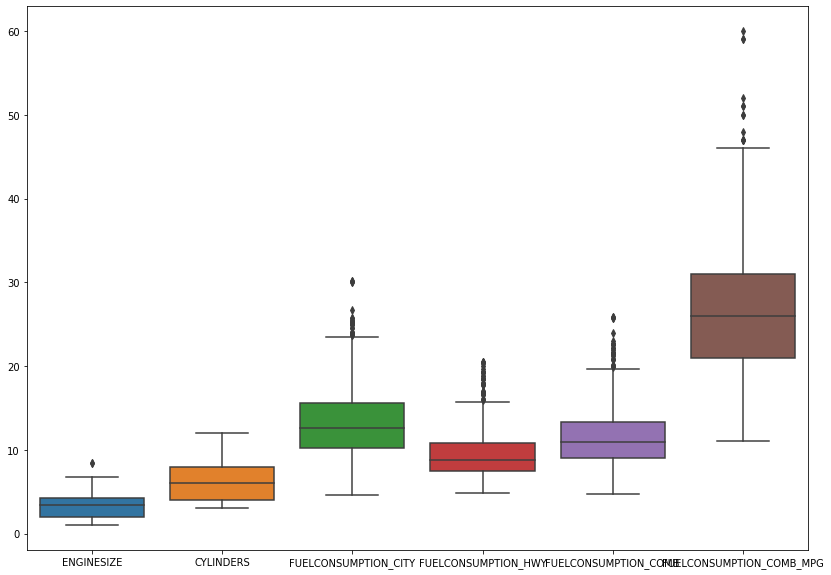

In [22]:
plt.figure(figsize=(14,10))
sns.boxplot(data=data.select_dtypes(['int64','float64']).drop(['MODELYEAR','CO2EMISSIONS'],axis=1))

# Diagnostic Analysis

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [23]:
data.select_dtypes(['int64','float64']).corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

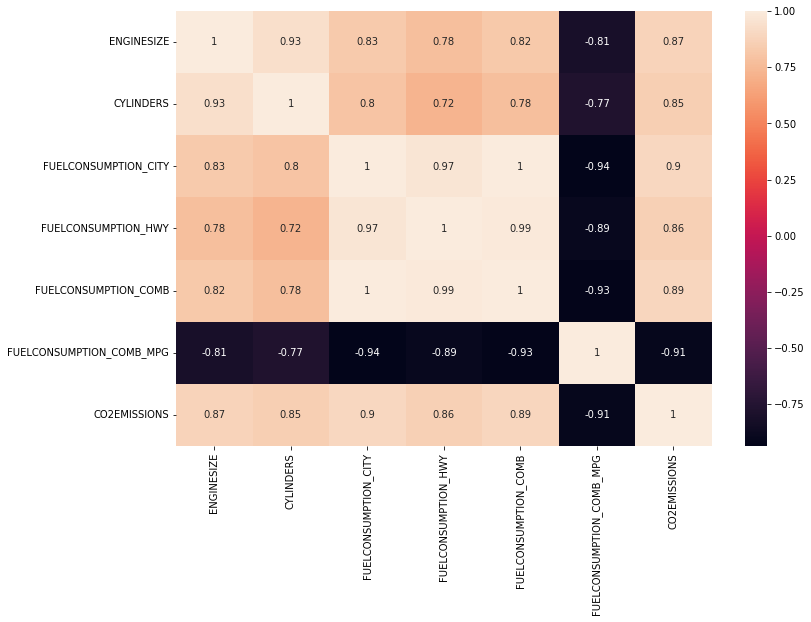

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(['int64','float64']).drop('MODELYEAR',axis=1).corr(),annot=True)

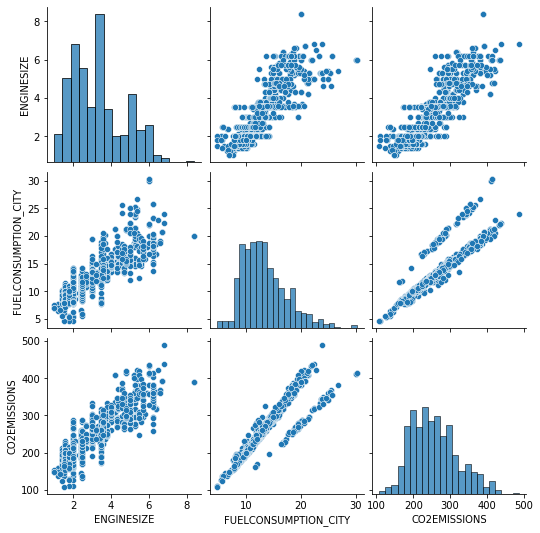

In [25]:
sns.pairplot(data[['ENGINESIZE','FUELCONSUMPTION_CITY','CO2EMISSIONS']])

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_CITY'>

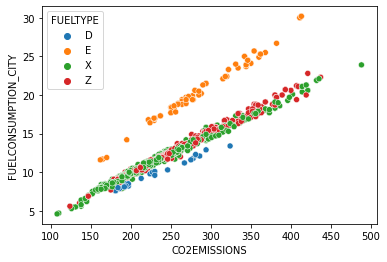

In [26]:
sns.scatterplot(data=data,x='CO2EMISSIONS',y='FUELCONSUMPTION_CITY',hue='FUELTYPE')

# Feature Selection & Training

![](https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2020/03/Linear_Regression_fit_with_Matrix_Multiplication.jpg?fit=594%2C396&ssl=1)

https://www.youtube.com/watch?v=iIUq0SqBSH0

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [28]:
model = LinearRegression()
model.fit(data[["ENGINESIZE"]],data["CO2EMISSIONS"])

LinearRegression()

In [33]:
model.coef_

array([39.12519979])

In [34]:
model.intercept_

125.30409949535695

In [39]:
manual_result = pd.DataFrame((model.coef_ * data[["ENGINESIZE"]] + model.intercept_))
manual_result.rename(columns={'ENGINESIZE':'CO2EMISSIONS'},inplace=True)
manual_result

,CO2EMISSIONS
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [48]:
model_result = pd.DataFrame(model.predict(data[["ENGINESIZE"]]))
model_result.columns = ["CO2EMISSIONS"]
model_result

,CO2EMISSIONS
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


![](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=v2&px=400)

In [29]:
mean_absolute_error, mean_squared_error, r2_score

(<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 <function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>,
 <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>)

![](https://i.imgur.com/19LNbyQ.jpeg)

![](https://pbs.twimg.com/media/FAX6eHvWEAIWBjB.png)

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSR-and-SST.jpg)

In [51]:
mean_absolute_error(data['CO2EMISSIONS'],model_result)

23.346887834400427

In [52]:
mean_squared_error(data['CO2EMISSIONS'],model_result)

946.3140527188748

In [53]:
r2_score(data["CO2EMISSIONS"],model_result)

0.7641458597854816

# Evaluation

![](https://spidec.files.wordpress.com/2017/05/fittings.jpg?w=702)

**Evaluation methods**
- Train - test
- Train - val - test
-> `train_test_split()`
- K-fold cross validation (K=5, 10, ...)
![](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [55]:
from sklearn.model_selection import KFold,cross_val_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE']],data['CO2EMISSIONS'],test_size=2,shuffle=True,random_state=42)
folds = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)

array([0.77094268, 0.78899489, 0.74928292, 0.72549231, 0.77632965])

# Tuning

In [58]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [59]:
model = LinearRegression()
model.fit(data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY"]],data["CO2EMISSIONS"])

LinearRegression()

In [61]:
result = pd.DataFrame(model.predict(data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY"]]))
result

,0
0,201.035207
1,216.519119
2,162.568931
3,254.263372
4,249.223006
...,...
1062,254.439897
1063,255.041336
1064,254.439897
1065,252.521153


In [62]:
r2_score(data["CO2EMISSIONS"],result)

0.8627973904839377

In [63]:
r2_score(data["CO2EMISSIONS"],model_result)

0.7641458597854816

In [30]:
'''
Optimize model
GridsearchCV
'''

'\nOptimize model\nGridsearchCV\n'

In [31]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.model_selection import GridSearchCV

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']],data['CO2EMISSIONS'],test_size=2,shuffle=True,random_state=42)
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
168,3.6,6,15.1,9.9,12.8,22
86,3.0,6,11.4,7.3,9.6,29
411,2.0,4,10.5,7.1,9.0,31
109,3.0,6,12.5,8.6,10.7,26
331,3.6,6,18.9,12.9,16.2,17


In [80]:
# Create k fold
folds = KFold(n_splits=5, shuffle=True, random_state=42) # portion

# Range to tune
hyper_params = [{'n_features_to_select':list(range(1,10))}]

# Specify model
model = LinearRegression()
model.fit(X_train,y_train)
rfe = RFE(model) #limit number of columns

# Tuning with GridSearchCV
model_cv = GridSearchCV(estimator=rfe,
                       param_grid=hyper_params,
                       scoring='r2',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [81]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007169,0.001368,0.001156,0.000272,1,{'n_features_to_select': 1},0.770943,0.788995,0.749283,0.725492,...,0.762208,0.022398,9,0.762628,0.758251,0.768033,0.772308,0.760907,0.764425,0.005077
1,0.006778,0.002461,0.000817,0.000102,2,{'n_features_to_select': 2},0.857544,0.886746,0.838503,0.845387,...,0.856918,0.016507,8,0.858246,0.851271,0.862607,0.860883,0.858627,0.858327,0.003866
2,0.004158,0.000026,0.000667,0.000008,3,{'n_features_to_select': 3},0.857028,0.886330,0.841011,0.854781,...,0.860197,0.014786,6,0.865501,0.858385,0.863130,0.865835,0.864518,0.863474,0.002712
3,0.003436,0.000022,0.000663,0.000006,4,{'n_features_to_select': 4},0.855904,0.886717,0.840953,0.855163,...,0.860009,0.014956,7,0.865870,0.858438,0.863167,0.865903,0.864829,0.863641,0.002785
4,0.002607,0.000013,0.000663,0.000010,5,{'n_features_to_select': 5},0.884286,0.907123,0.850763,0.876085,...,0.875915,0.019441,5,0.890228,0.884667,0.866743,0.891853,0.864857,0.879670,0.011588
5,0.001684,0.000007,0.000655,0.000017,6,{'n_features_to_select': 6},0.884296,0.907150,0.887705,0.876093,...,0.887441,0.010557,1,0.890228,0.884673,0.889407,0.891853,0.891287,0.889489,0.002552
6,0.001742,0.000023,0.000660,0.000012,7,{'n_features_to_select': 7},0.884296,0.907150,0.887705,0.876093,...,0.887441,0.010557,1,0.890228,0.884673,0.889407,0.891853,0.891287,0.889489,0.002552
7,0.002055,0.000186,0.000847,0.000067,8,{'n_features_to_select': 8},0.884296,0.907150,0.887705,0.876093,...,0.887441,0.010557,1,0.890228,0.884673,0.889407,0.891853,0.891287,0.889489,0.002552
8,0.002155,0.000275,0.000845,0.000142,9,{'n_features_to_select': 9},0.884296,0.907150,0.887705,0.876093,...,0.887441,0.010557,1,0.890228,0.884673,0.889407,0.891853,0.891287,0.889489,0.002552


/Users/liamnguyen/opt/anaconda3/envs/demoenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/liamnguyen/opt/anaconda3/envs/demoenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


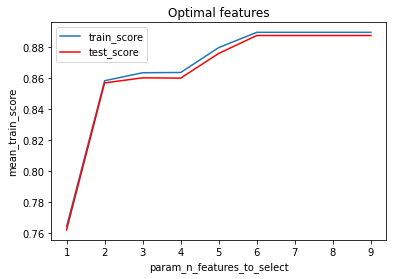

<Figure size 864x576 with 0 Axes>

In [83]:
sns.lineplot(cv_result['param_n_features_to_select'],cv_result['mean_train_score'])
sns.lineplot(cv_result['param_n_features_to_select'],cv_result['mean_test_score'],color='red')
plt.legend(['train_score','test_score'])
plt.title('Optimal features')
plt.figure(figsize=(12,8))
plt.show()